In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from math import *

Load the .csv file and convert the string to number

In [17]:
# Read data from CSV file
df = pd.read_csv('edgecol_output_data2nd.csv') #change file name according to need

table =  df.iloc[:, 1].apply(lambda x: [int(i) for i in x.strip('[]').split(', ')])

Get the important columns from the dataframe

In [18]:
n_vertex =  [lst[2] for lst in table]

m_final =  [lst[-6] for lst in table]

m_initial =  [lst[3] for lst in table]

Define the functions to calculate the thepretical value

In [19]:
def f(x,c):
	return exp(-1*(c*(1-x))**2)  #c**2

def gamma(c):
  maxt = 100
  z=0
  for i in range(1,maxt):
    z=f(z,c)
  return(z, 1-f(z,c)-(c**2)*z*((1-z)**2), 1- ((c**2)/3.0)*(1-(1-z)**3))#(\gamma,lowerbound,upperbound)

def expedge(n,c):
	return(0.5*c*(sqrt(n))*(n-1))

In [22]:
thval= gamma(1.7)

ub = thval[2]

lb = thval[1]

Calculate theoretical upper and lower bound

c=1.7

In [23]:
c=1.7 # change accordingly

m_ub = [ub*expedge(n,c) for n in n_vertex]

m_lb = [lb*expedge(n,c) for n in n_vertex]

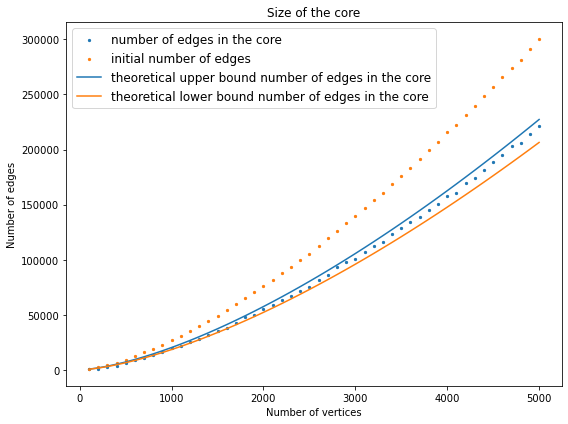

In [25]:


# Plotting the data
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.scatter(n_vertex, m_final, s=5, label = 'number of edges in the core')
plt.scatter(n_vertex, m_initial, s=5, label = 'initial number of edges')
plt.plot(n_vertex, m_ub, label = 'theoretical upper bound number of edges in the core')
plt.plot(n_vertex, m_lb, label = 'theoretical lower bound number of edges in the core')
plt.title('Size of the core')
plt.xlabel('Number of vertices')
plt.ylabel('Number of edges')
plt.legend(fontsize='large')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


Plotting another file (c=2.0)

In [26]:
# Read data from CSV file
df = pd.read_csv('edgecol_output_data_c=2.0.csv') #change file name according to need

table =  df.iloc[:, 1].apply(lambda x: [int(i) for i in x.strip('[]').split(', ')])

In [27]:
n_vertex =  [lst[2] for lst in table]

m_final =  [lst[-6] for lst in table]

m_initial =  [lst[3] for lst in table]

In [28]:
thval= gamma(2.0)

ub = thval[2]

lb = thval[1]

In [29]:
c=2.0 # change accordingly

m_ub = [ub*expedge(n,c) for n in n_vertex]

m_lb = [lb*expedge(n,c) for n in n_vertex]

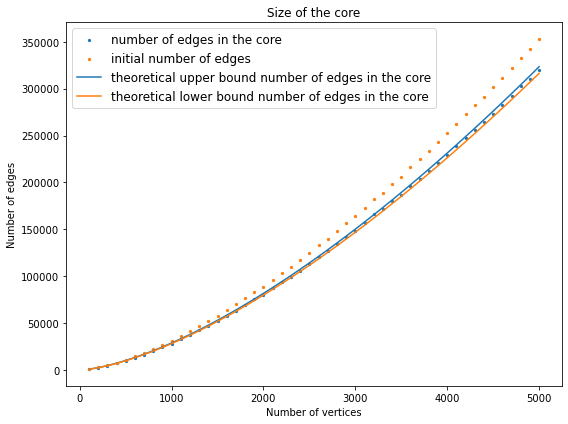

In [30]:


# Plotting the data
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.scatter(n_vertex, m_final, s=5, label = 'number of edges in the core')
plt.scatter(n_vertex, m_initial, s=5, label = 'initial number of edges')
plt.plot(n_vertex, m_ub, label = 'theoretical upper bound number of edges in the core')
plt.plot(n_vertex, m_lb, label = 'theoretical lower bound number of edges in the core')
plt.title('Size of the core')
plt.xlabel('Number of vertices')
plt.ylabel('Number of edges')
plt.legend(fontsize='large')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


n=1500

In [40]:
# Read data from CSV file
df = pd.read_csv('edgecol_output_data_n=1500.csv') #change file name according to need

table =  df.iloc[:, 1].apply(lambda x: [int(i) for i in x.strip('[]').split(', ')])

n_vertex =  [lst[2] for lst in table]

m_final =  [lst[-6] for lst in table]

m_initial =  [lst[3] for lst in table]

cval = df.iloc[:, 0]

cval = cval.tolist()

In [41]:
n=1500 # change accordingly

m_ub = [gamma(c)[2]*expedge(n,c) for c in cval]

m_lb = [gamma(c)[1]*expedge(n,c) for c in cval]

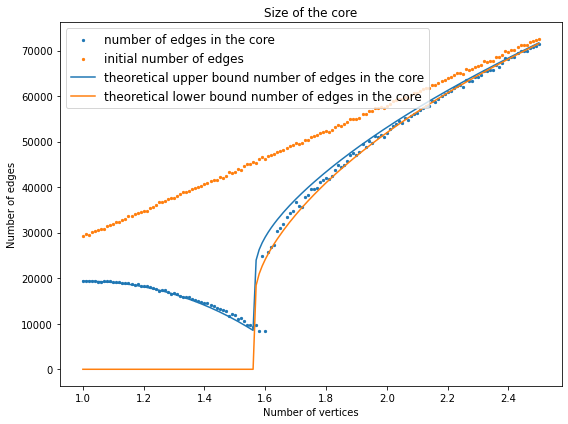

In [43]:
# Plotting the data
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.scatter(cval, m_final, s=5, label = 'number of edges in the core') 
plt.scatter(cval, m_initial, s=5, label = 'initial number of edges') 
plt.plot(cval, m_ub, label = 'theoretical upper bound number of edges in the core') 
plt.plot(cval, m_lb, label = 'theoretical lower bound number of edges in the core') 
plt.title('Size of the core')
plt.xlabel('Number of vertices')
plt.ylabel('Number of edges')
plt.legend(fontsize='large')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()